# DDPLKO Moduł 4 - praca domowa - Quickdraw 10 class - regularyzacja

Twoim zadaniem w tym module będzie przygotowanie własnego modelu sieci neuronowej korzystając z regularyzacji.

Lista rzeczy które musi spełnić Twój model:
- [x] działać na wybranych przez Ciebie 10 klasach (bazuj na kodzie z modułu 3)
- [ ] liczba parametrów pomiędzy 100'000 a 200'000
- [ ] wykorzystane przynajmniej 2 sposoby walki z regularyzacją
- [ ] mieć wykonane co najmniej 4 zmiany w celu poprawy wyniku; zachowaj wszystkie iteracje (modyfikując model możesz dodać opcje w funkji, bądź skopiować klasę/funkcję, tak by było widać kolejne architektury)
- [ ] opisz co chcesz sprawdzić w kolejnych eksperymentach (np. sprawdzę czy Dropout pomaga i z jaką wartością drop ratio najbardziej)
- [ ] uzyskiwać lepsze `validation accuracy` niż w przypadku pierwszego modelu z poprzedniego modułu (im więcej punktów procentowych różnicy tym lepiej)

Zwizualizuj proszę:
- [ ] historie treningów (wystarczy Val acc, ale train acc czy lossy też mogą być)
- [ ] zależność: liczba parametrów - val acc

Możesz (czyli opcjonalne rzeczy):
- pracować na zmniejszonym zbiorze, by dobrać wartość parametrów
- np. zastosować dropout, pooling i early stopping
- zastosować TF2 - Keras / PyTorcha czy PL (Pytorch Lightning)
- dodać LR scheduler do swojego treningu (i sprawdzić czy to poprawiło wynik)
- zwizualizować dodatkowo:
  - confussion matrix
  - błędne przypadki

Warto:
- zmieniać 1 parametr między eksperymentami (szczególnie trudne gdy się już nabierze wyczucia)

# Z poprzednich modułów

In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
class_names=['laptop', 'frog', 'mermaid','cat', 'yoga', 'apple', 'castle', 'computer', 'cow', 'face']

In [3]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

In [4]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

laptop          <class 'numpy.ndarray'>
frog            <class 'numpy.ndarray'>
mermaid         <class 'numpy.ndarray'>
cat             <class 'numpy.ndarray'>
yoga            <class 'numpy.ndarray'>
apple           <class 'numpy.ndarray'>
castle          <class 'numpy.ndarray'>
computer        <class 'numpy.ndarray'>
cow             <class 'numpy.ndarray'>
face            <class 'numpy.ndarray'>


In [5]:
data_res = []
for name in class_names:
    file_name = name+'.npy'
    imgs = np.load(file_name, fix_imports=True, allow_pickle=True)
    imgs_res = imgs.reshape(-1,28,28)
    data_res.append(imgs_res)   

# Tensorflow z modułu 3

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5)
import tensorflow as tf

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
X = np.concatenate(data_res)
X = X.reshape(-1,28,28,1)
y = np.array([])

#for i in range (0,10): #może być używane zamiennie
for i, imgs_res in enumerate(data_res):   
    y = np.append(y, np.ones(len(data_res[i]))*i) #etykiety per klasa
  
X = X / 255

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

## Model skopiowany z lekcji jako bazowy model do ulepszeń

In [8]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                154890    
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 295s 56ms/step - loss: 0.4781 - accuracy: 0.8496 - val_loss: 0.3907 - val_accuracy: 0.8777
Epoch 2/10
5252/5252 [==============================] - 285s 54ms/step - loss: 0.3696 - accuracy: 0.8851 - val_loss: 0.3690 - val_accuracy: 0.8835
Epoch 3/10
5252/5252 [==============================] - 281s 54ms/step - loss: 0.3431 - accuracy: 0.8926 - val_loss: 0.3448 - val_accuracy: 0.8925
Epoch 4/10
5252/5252 [==============================] - 275s 52ms/step - loss: 0.3283 - accuracy: 0.8969 - val_loss: 0.3412 - val_accuracy: 0.8923
Epoch 5/10
5252/5252 [==============================] - 276s 53ms/step - loss: 0.3187 - accuracy: 0.8997 - val_loss: 0.3381 - val_accuracy: 0.8936
Epoch 6/10
5252/5252 [==============================] - 277s 53ms/step - loss: 0.3115 - accuracy: 0.9016 - val_loss: 0.3386 - val_accuracy: 0.8937
Epoch 7/10
5252/5252 [==============================] - 283s 54ms/step - loss: 0.3056 - accuracy: 0.9032 - val_loss: 0

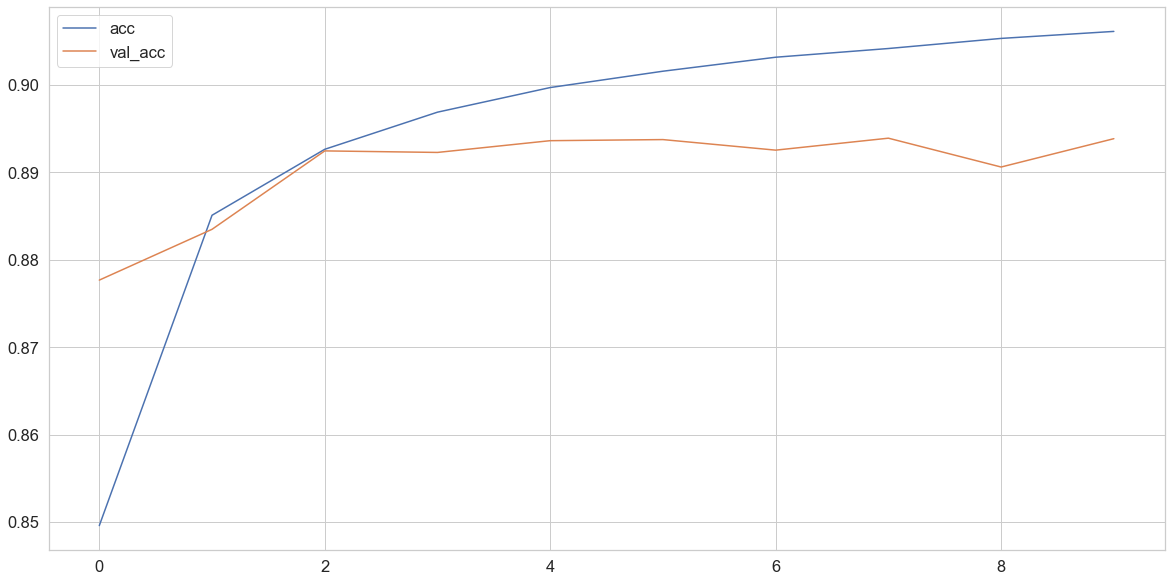

In [10]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## Próba poprawy modelu poprzez zmiane funkcji aktywacji

Zmiana funkcji aktywacji na mish, gdyż wg lekcji 4.01 ma największe accuracy

In [10]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='swish',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='swish'),
                tf.keras.layers.Conv2D(32,(3,3), activation='swish'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                154890    
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 475s 90ms/step - loss: 0.6249 - accuracy: 0.8014 - val_loss: 0.4841 - val_accuracy: 0.8469
Epoch 2/10
5252/5252 [==============================] - 484s 92ms/step - loss: 0.4637 - accuracy: 0.8543 - val_loss: 0.4426 - val_accuracy: 0.8599
Epoch 3/10
5252/5252 [==============================] - 486s 93ms/step - loss: 0.4277 - accuracy: 0.8654 - val_loss: 0.4176 - val_accuracy: 0.8696
Epoch 4/10
5252/5252 [==============================] - 476s 91ms/step - loss: 0.4083 - accuracy: 0.8718 - val_loss: 0.4237 - val_accuracy: 0.8665
Epoch 5/10
5252/5252 [==============================] - 475s 91ms/step - loss: 0.3973 - accuracy: 0.8750 - val_loss: 0.4094 - val_accuracy: 0.8728
Epoch 6/10
5252/5252 [==============================] - 482s 92ms/step - loss: 0.3888 - accuracy: 0.8780 - val_loss: 0.4028 - val_accuracy: 0.8732
Epoch 7/10
5252/5252 [==============================] - 476s 91ms/step - loss: 0.3823 - accuracy: 0.8795 - val_loss: 0

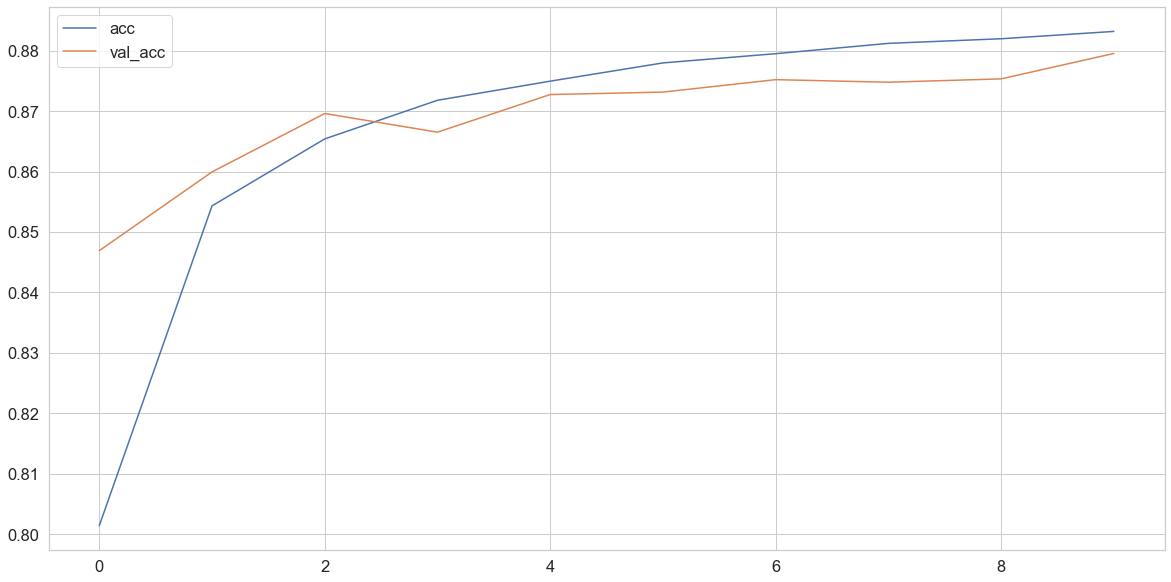

In [12]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## Inne rodzaje sieci konwolucyjnych

In [13]:
def getModel(stride=1,dilation=1,border='valid',kernel=(3,3),input_shape=(28, 28,1),groups=[1,1,1]):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(1,kernel,input_shape=input_shape, strides=(stride,stride), padding=border,
                        dilation_rate=(dilation,dilation), groups=groups[0], activation='relu',
                        ),
                tf.keras.layers.Conv2D(8,kernel, strides=(stride,stride), padding=border,
                        dilation_rate=(dilation,dilation), groups=groups[1], activation='relu',
                        ),
                tf.keras.layers.Conv2D(8,kernel, strides=(stride,stride), padding=border,
                        dilation_rate=(dilation,dilation), groups=groups[2], activation='relu',
                        ),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 451s 86ms/step - loss: 0.3650 - accuracy: 0.8845 - val_loss: 0.4173 - val_accuracy: 0.8720
Epoch 2/10
5252/5252 [==============================] - 491s 93ms/step - loss: 0.3625 - accuracy: 0.8850 - val_loss: 0.4014 - val_accuracy: 0.8723
Epoch 3/10
5252/5252 [==============================] - 499s 95ms/step - loss: 0.3592 - accuracy: 0.8861 - val_loss: 0.3860 - val_accuracy: 0.8787
Epoch 4/10
5252/5252 [==============================] - 492s 94ms/step - loss: 0.3565 - accuracy: 0.8868 - val_loss: 0.4029 - val_accuracy: 0.8760
Epoch 5/10
5252/5252 [==============================] - 490s 93ms/step - loss: 0.3544 - accuracy: 0.8875 - val_loss: 0.4104 - val_accuracy: 0.8684
Epoch 6/10
5252/5252 [==============================] - 489s 93ms/step - loss: 0.3526 - accuracy: 0.8878 - val_loss: 0.3841 - val_accuracy: 0.8802
Epoch 7/10
5252/5252 [==============================] - 487s 93ms/step - loss: 0.3508 - accuracy: 0.8884 - val_loss: 0

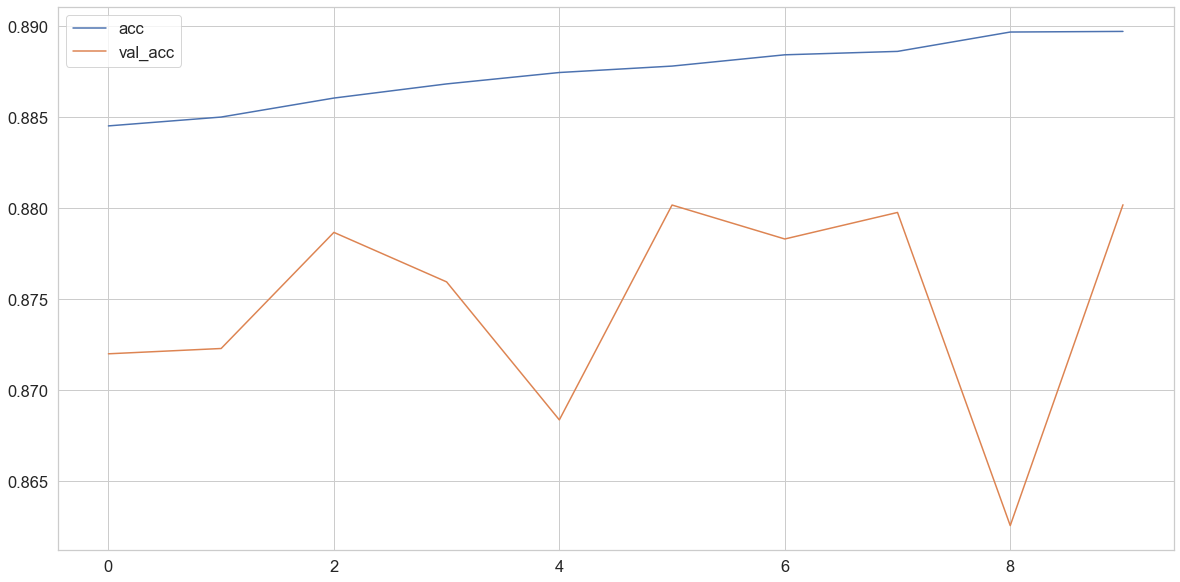

In [15]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

Wniosek: chyba to nie był za dobry pomysł ;)

## Optymalizatory

Wybrałam RMSprop bo wg lekcji 4.06 ma największe accuracy

In [29]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
flatten_9 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                154890    
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


In [30]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 309s 59ms/step - loss: 0.4843 - accuracy: 0.8475 - val_loss: 0.4068 - val_accuracy: 0.8743
Epoch 2/10
5252/5252 [==============================] - 303s 58ms/step - loss: 0.3771 - accuracy: 0.8834 - val_loss: 0.3715 - val_accuracy: 0.8842
Epoch 3/10
5252/5252 [==============================] - 304s 58ms/step - loss: 0.3575 - accuracy: 0.8893 - val_loss: 0.3593 - val_accuracy: 0.8891
Epoch 4/10
5252/5252 [==============================] - 303s 58ms/step - loss: 0.3477 - accuracy: 0.8923 - val_loss: 0.3716 - val_accuracy: 0.8845
Epoch 5/10
5252/5252 [==============================] - 303s 58ms/step - loss: 0.3427 - accuracy: 0.8939 - val_loss: 0.3741 - val_accuracy: 0.8865
Epoch 6/10
5252/5252 [==============================] - 304s 58ms/step - loss: 0.3394 - accuracy: 0.8947 - val_loss: 0.3689 - val_accuracy: 0.8849
Epoch 7/10
5252/5252 [==============================] - 303s 58ms/step - loss: 0.3372 - accuracy: 0.8953 - val_loss: 0

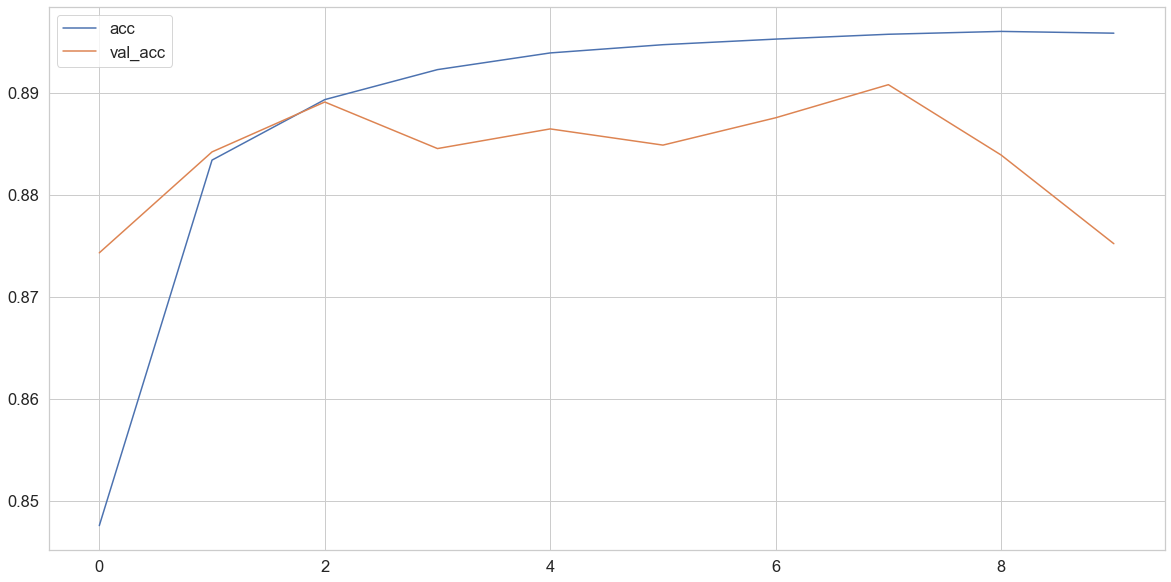

In [31]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## Swish + RMSProp

In [19]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='swish',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='swish'),
                tf.keras.layers.Conv2D(32,(3,3), activation='swish'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
flatten_5 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                154890    
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 488s 93ms/step - loss: 0.6245 - accuracy: 0.8001 - val_loss: 0.5204 - val_accuracy: 0.8379
Epoch 2/10
5252/5252 [==============================] - 490s 93ms/step - loss: 0.4688 - accuracy: 0.8521 - val_loss: 0.4517 - val_accuracy: 0.8582
Epoch 3/10
5252/5252 [==============================] - 478s 91ms/step - loss: 0.4344 - accuracy: 0.8631 - val_loss: 0.4911 - val_accuracy: 0.8480
Epoch 4/10
5252/5252 [==============================] - 477s 91ms/step - loss: 0.4158 - accuracy: 0.8692 - val_loss: 0.4544 - val_accuracy: 0.8584
Epoch 5/10
5252/5252 [==============================] - 477s 91ms/step - loss: 0.4038 - accuracy: 0.8728 - val_loss: 0.4624 - val_accuracy: 0.8556
Epoch 6/10
5252/5252 [==============================] - 478s 91ms/step - loss: 0.3947 - accuracy: 0.8755 - val_loss: 0.4646 - val_accuracy: 0.8462
Epoch 7/10
5252/5252 [==============================] - 477s 91ms/step - loss: 0.3883 - accuracy: 0.8776 - val_loss: 0

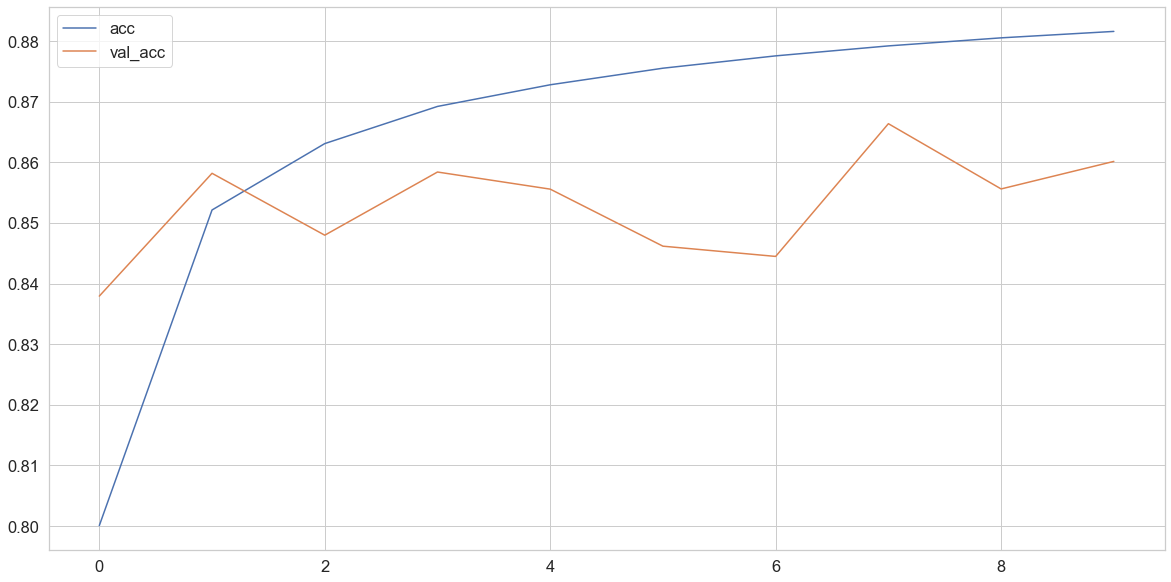

In [21]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## Dropout (lekcja 4.09)

In [26]:
def getModelDropout(ratios=[0.0,0.0]):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Dropout(ratios[0]),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(ratios[1]),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModelDropout([0,0])
model.summary()
#del model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        2336      
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                184330    
Total params: 186,746
Trainable params: 186,746
Non-trainable params: 0
________________________________________________

In [27]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 196s 37ms/step - loss: 0.5193 - accuracy: 0.8351 - val_loss: 0.4388 - val_accuracy: 0.8625
Epoch 2/10
5252/5252 [==============================] - 197s 37ms/step - loss: 0.4092 - accuracy: 0.8717 - val_loss: 0.3978 - val_accuracy: 0.8753
Epoch 3/10
5252/5252 [==============================] - 197s 38ms/step - loss: 0.3793 - accuracy: 0.8812 - val_loss: 0.3843 - val_accuracy: 0.8799
Epoch 4/10
5252/5252 [==============================] - 196s 37ms/step - loss: 0.3629 - accuracy: 0.8861 - val_loss: 0.3835 - val_accuracy: 0.8812
Epoch 5/10
5252/5252 [==============================] - 196s 37ms/step - loss: 0.3519 - accuracy: 0.8891 - val_loss: 0.3857 - val_accuracy: 0.8786
Epoch 6/10
5252/5252 [==============================] - 196s 37ms/step - loss: 0.3441 - accuracy: 0.8914 - val_loss: 0.3790 - val_accuracy: 0.8821
Epoch 7/10
5252/5252 [==============================] - 196s 37ms/step - loss: 0.3377 - accuracy: 0.8930 - val_loss: 0

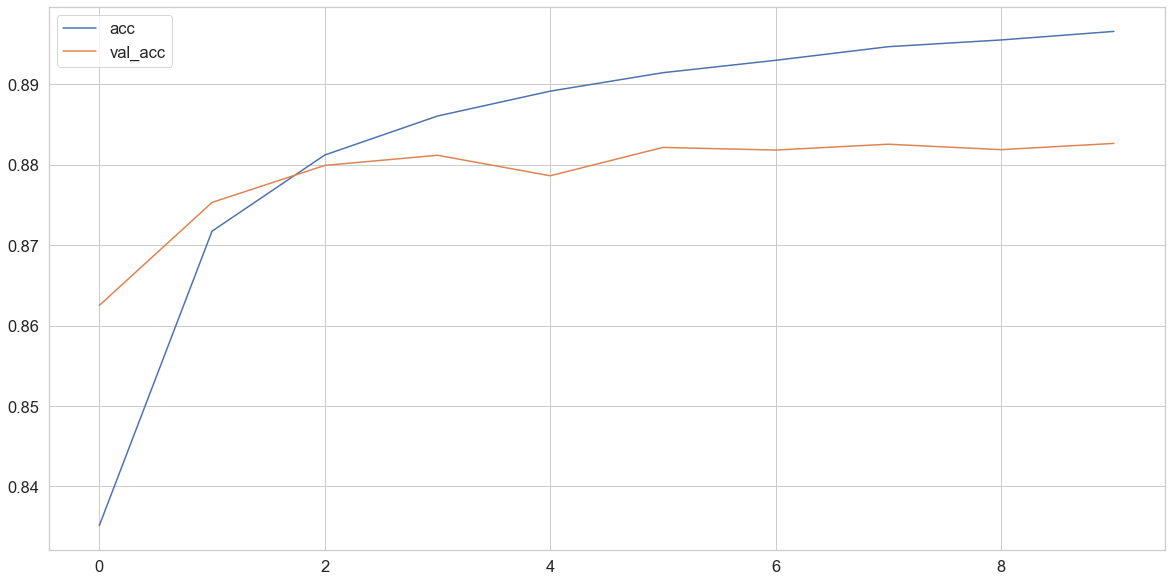

In [28]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## Dropout modyfikacja

In [35]:
def getModelDropout(ratios=[0.0,0.0]):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Dropout(ratios[0]),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(ratios[1]),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModelDropout([0.1,0.2])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 32)        2336      
_________________________________________________________________
flatten_14 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                184330    
Total params: 186,746
Trainable params: 186,746
Non-trainable params: 0
_______________________________________________

In [36]:
epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

Epoch 1/10
5252/5252 [==============================] - 364s 69ms/step - loss: 0.5378 - accuracy: 0.8282 - val_loss: 0.4336 - val_accuracy: 0.8651
Epoch 2/10
5252/5252 [==============================] - 395s 75ms/step - loss: 0.4395 - accuracy: 0.8614 - val_loss: 0.4120 - val_accuracy: 0.8716
Epoch 3/10
5252/5252 [==============================] - 402s 77ms/step - loss: 0.4154 - accuracy: 0.8690 - val_loss: 0.3882 - val_accuracy: 0.8793
Epoch 4/10
5252/5252 [==============================] - 398s 76ms/step - loss: 0.4015 - accuracy: 0.8733 - val_loss: 0.3843 - val_accuracy: 0.8807
Epoch 5/10
5252/5252 [==============================] - 400s 76ms/step - loss: 0.3933 - accuracy: 0.8756 - val_loss: 0.3786 - val_accuracy: 0.8811
Epoch 6/10
5252/5252 [==============================] - 402s 77ms/step - loss: 0.3878 - accuracy: 0.8775 - val_loss: 0.3820 - val_accuracy: 0.8803
Epoch 7/10
5252/5252 [==============================] - 402s 77ms/step - loss: 0.3833 - accuracy: 0.8785 - val_loss: 0

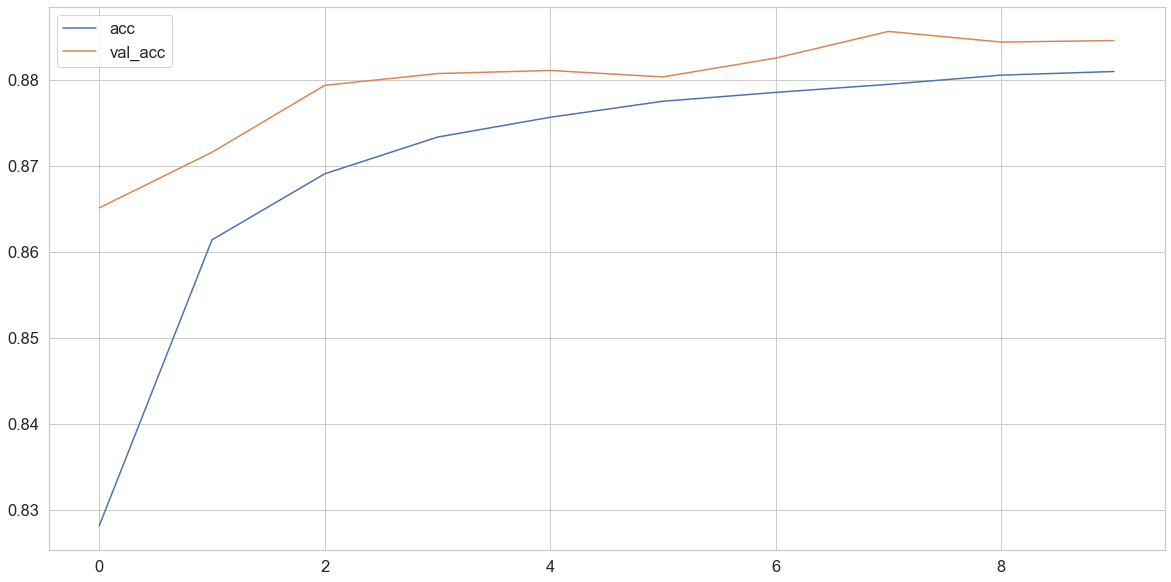

In [37]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        2336      
_________________________________________________________________
flatten_15 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                184330    
Total params: 186,746
Trainable params: 186,746
Non-trainable params: 0
_______________________________________________

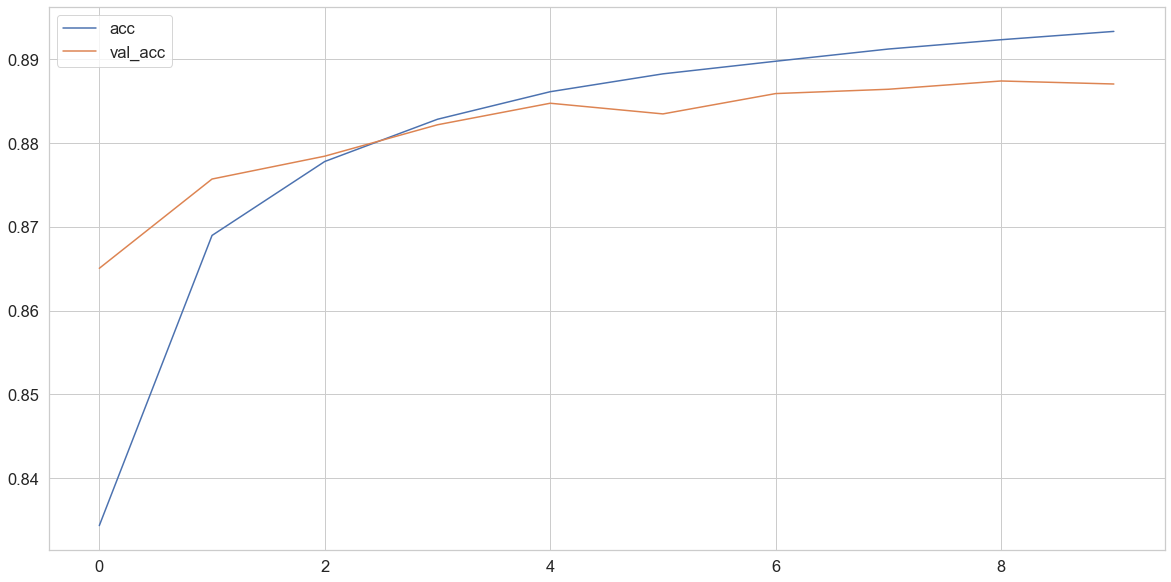

In [38]:
model = getModelDropout([0.0,0.1])
model.summary()

epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 32)        2336      
_________________________________________________________________
flatten_16 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 18432)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                184330    
Total params: 186,746
Trainable params: 186,746
Non-trainable params: 0
_______________________________________________

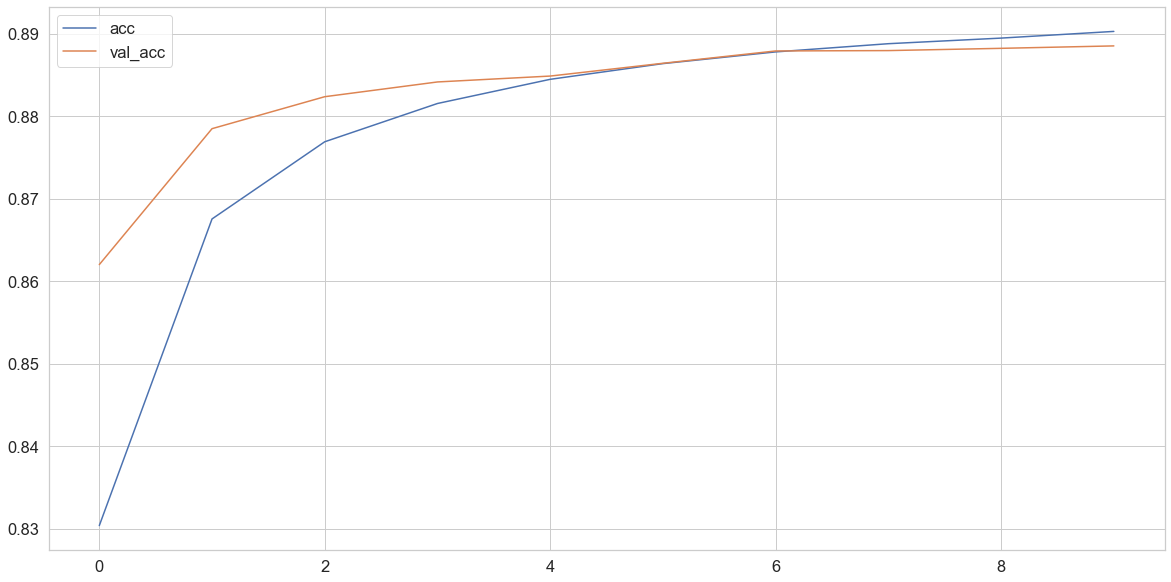

In [39]:
model = getModelDropout([0.0,0.2])
model.summary()

epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## Pooling z lekcji 4.08

In [32]:
def getModelCNN():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='CNN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelCNNPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='CNNPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelMaxPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='MaxPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelAvgPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.AvgPool2D(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.AvgPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='AvgPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelGlobalMaxPooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(10, activation='softmax')], name='GlobalMaxPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def getModelGlobalAveragePooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(10, activation='softmax')], name='GlobalAveragePooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [33]:
def vizualize_results(models, histories):
    plt.figure(figsize=(20,10))
    ax1=plt.subplot(121)
    
    srtd = sorted(zip(models, histories), key=lambda x: max(x[1].history['val_accuracy']))[::-1]
    for name, history in srtd:
        plt.plot(history.history['accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Training accuracy')
        plt.legend()
    plt.subplot(122, sharey=ax1)
    for name, history in srtd:
        plt.plot(history.history['val_accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Validation accuracy')
        plt.legend();

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 128)       9344      
_________________________________________________________________
flatten_10 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                737290    
Total params: 746,714
Trainable params: 746,714
Non-trainable params: 0
_________________________________________________________________
CNN
Model: "CNNPooling"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 13, 13, 8)         80        
_________________________________

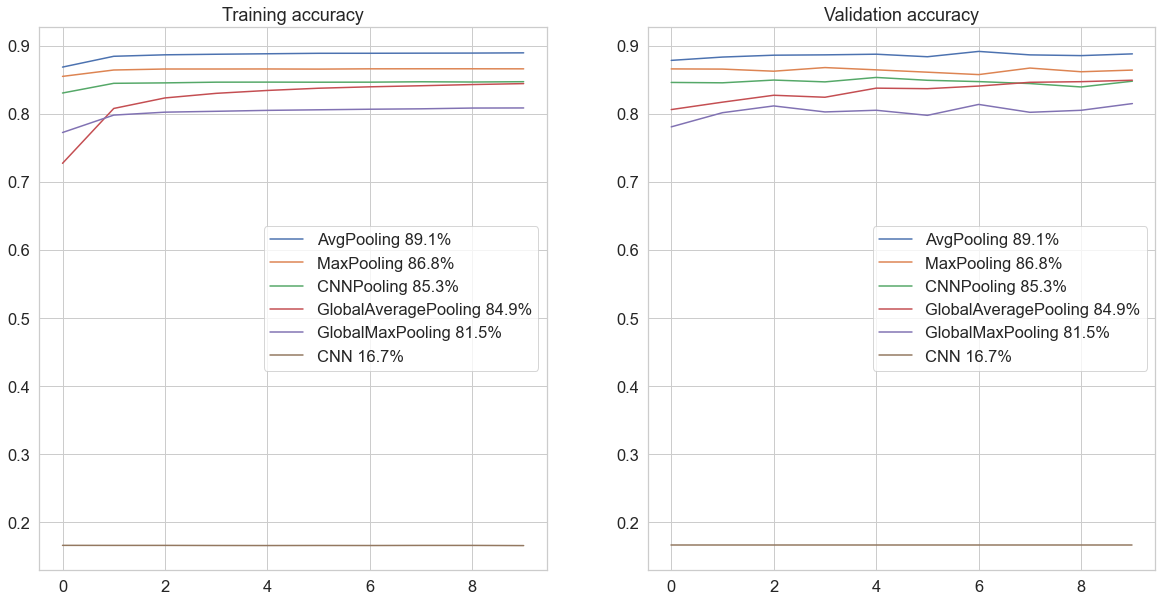

In [34]:
epochs=10
batch_size=128
histories = []
models=[getModelCNN, getModelCNNPooling, getModelMaxPooling, getModelAvgPooling, getModelGlobalMaxPooling, getModelGlobalAveragePooling]
model_names=[]
for m in models:
    model=m()
    model.summary()
    model_names.append(model.name)
    print(model.name)
    history = model.fit(X_train,
                       y_train,
                       epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    del model
    histories.append(history)
vizualize_results(model_names, histories)

Wniosek: w porównaniu z lekcją 4.08 rożne rodzaje poolingu w zupełnie inny sposób polepszają i pogorszają accuracy w zależności od trenowanego zbioru.



## Zmodyfikowany model

In [40]:
def getMyModel(ratios=[0.0,0.0]):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='swish',input_shape=(28, 28,1)),
                tf.keras.layers.Dropout(ratios[0]),
                tf.keras.layers.Conv2D(32,(3,3), activation='swish'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(ratios[1]),
                tf.keras.layers.AvgPool2D(),
                tf.keras.layers.Dense(10, activation='softmax')], name='AvgPooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        2336      
_________________________________________________________________
flatten_17 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 18432)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                184330    
Total params: 186,746
Trainable params: 186,746
Non-trainable params: 0
_______________________________________________

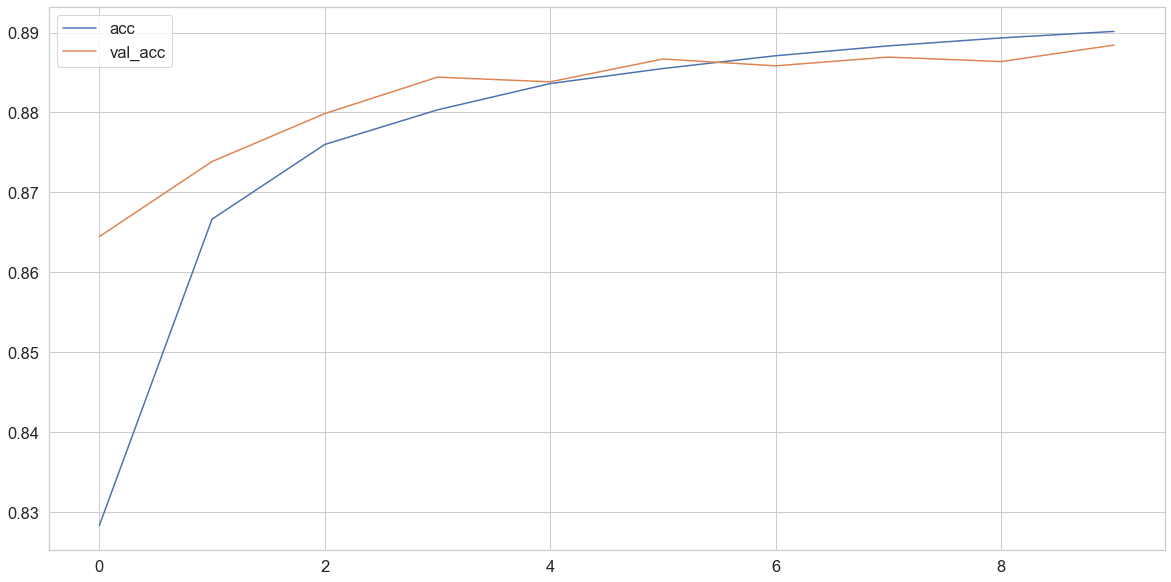

In [41]:
model = getModelDropout([0.0,0.2])
model.summary()

epochs=10
batch_size=256
        
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val,y_val),)

plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()